In [121]:
import numpy as np
import matplotlib.pyplot as plt
import NeuralNetwork as NW

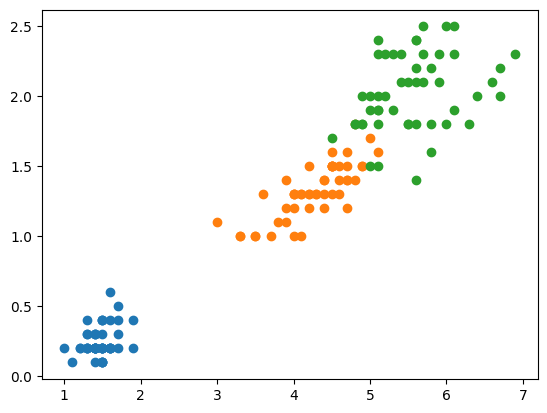

In [122]:
# Load data

iris_dtype = np.dtype([('vals', float, (4,)), 
                       ('art', np.str_, 16)])
vals, labels = np.loadtxt('../iris/iris.data', dtype=iris_dtype, delimiter=',', unpack=True)

iris = vals.T

iris.shape, labels

for lab in np.unique(labels):
    plt.plot(*iris[2:4, labels == lab], 'o')

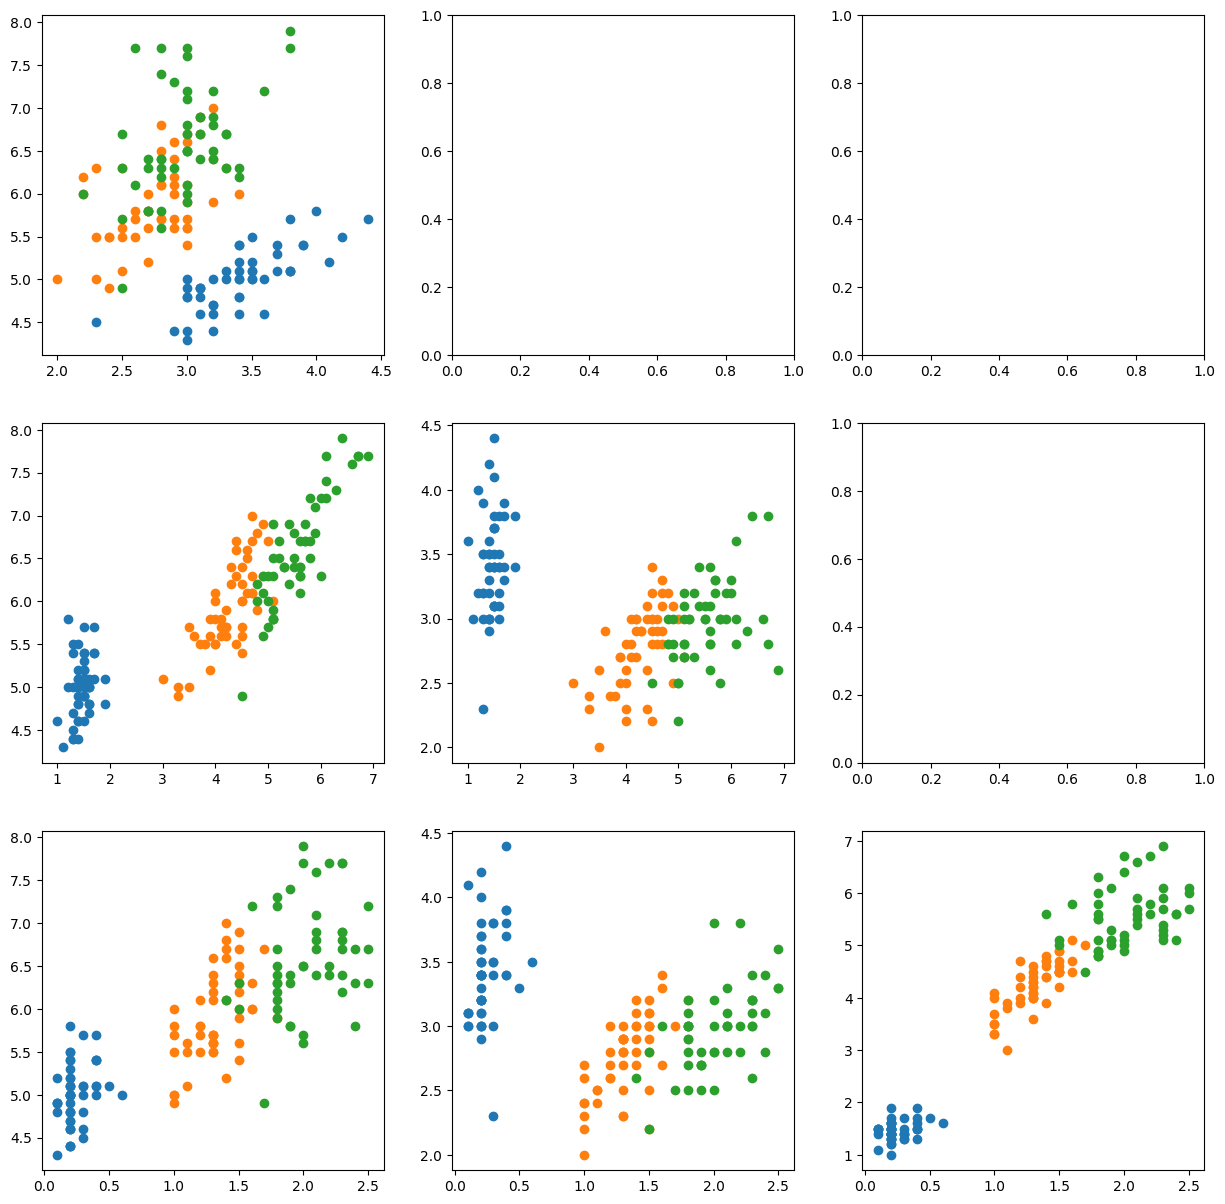

In [123]:
# Plot of different variables against eachother
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i in range(4):
    for j in range(4):
        if i <= j:
            continue

        plotMat = np.vstack([iris[i], iris[j]])
        for lab in np.unique(labels):
            ax[i-1, j].plot(*plotMat[:, labels == lab], 'o')

# Training network with Iris data

In [124]:
layerIris = [
            {
                    "layerSize" : 4,               # parameter for deciding the amount of nodes in the layer
                    "layerType" : 0                 # Only a single layer type exists right now, so just use 0 (Convolutional layers will be added)
            }, 
            {
                    "layerSize" : 12,               # parameter for deciding the amount of nodes in the layer
                    "layerType" : 0                 # Only a single layer type exists right now, so just use 0 (Convolutional layers will be added)
            }, 
            {
                    "layerSize" : 3,               # parameter for deciding the amount of nodes in the layer
                    "layerType" : 0                 # Only a single layer type exists right now, so just use 0 (Convolutional layers will be added)
            }, 
        ]

IrisNetwork = NW.NeuralNetwork(layerIris)

In [125]:
iris.shape, labels.shape

((4, 150), (150,))

In [126]:
labels[0:149:50]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U16')

## Opdeling af data i et testsæt og et træningssæt

Træningssættet kommer til at indeholde 30 elementer, og testsættet kommer til at indeholde 20 elementer.

In [127]:
irisTrain = np.hstack([iris[:, 0:30], iris[:, 50:80], iris[:, 100:130]])
labelsTrain = np.hstack([labels[0:30], labels[50:80], labels[100:130]])

irisTest = np.hstack([iris[:, 30:50], iris[:, 80:100], iris[:, 130:150]])
labelsTest = np.hstack([labels[30:50], labels[80:100], labels[130:150]])

irisTrain.shape, labelsTrain.shape, irisTest.shape, labelsTest.shape, labelsTrain

((4, 90),
 (90,),
 (4, 60),
 (60,),
 array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicol

In [128]:
# Convert labels to expected outputs

expectedTrainingOutputs = np.array([])
for label in labelsTrain:
    expectedOutput = np.ndarray(0)
    if label == 'Iris-setosa':
        expectedOutput = np.array([1., 0., 0.]) [:, np.newaxis]
    elif label == 'Iris-versicolor':
        expectedOutput = np.array([0., 1., 0.]) [:, np.newaxis]
    else:
        expectedOutput = np.array([0., 0., 1.]) [:, np.newaxis]

    if expectedTrainingOutputs.size == 0:
        expectedTrainingOutputs = expectedOutput
    else:
        expectedTrainingOutputs = np.hstack([expectedTrainingOutputs, expectedOutput])

expectedTrainingOutputs[:, 0:90:6]


array([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]])

In [129]:
# Convert labels to expected outputs

expectedTestOutputs = np.array([])
for label in labelsTest:
    expectedOutput = np.ndarray(0)
    if label == 'Iris-setosa':
        expectedOutput = np.array([1., 0., 0.]) [:, np.newaxis]
    elif label == 'Iris-versicolor':
        expectedOutput = np.array([0., 1., 0.]) [:, np.newaxis]
    else:
        expectedOutput = np.array([0., 0., 1.]) [:, np.newaxis]

    if expectedTestOutputs.size == 0:
        expectedTestOutputs = expectedOutput
    else:
        expectedTestOutputs = np.hstack([expectedTestOutputs, expectedOutput])

expectedTestOutputs[:, 0:60:6]


array([[1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [130]:
for i in range(300):
    IrisNetwork.trainNetworkGradDec(trainingInput=irisTrain, expectedOutputMatrix=expectedTrainingOutputs, iterationNum=i)
    print("Iteration: ", i)
    
    # Check correctness
    counter : int = 0
    for test in range(len(irisTest[0])):
        IrisNetwork.setInput(input=irisTest[:, test])
        IrisNetwork.runNetwork()
        #print(np.argmax(IrisNetwork.getOutput() [:, np.newaxis]), np.argmax(expectedTestOutputs[:, test] [:, np.newaxis]))
        if np.argmax(IrisNetwork.getOutput() [:, np.newaxis]) == np.argmax(expectedTestOutputs[:, test] [:, np.newaxis]):
            counter += 1

    print(counter / len(irisTest[0]))

GradientLength:  17.02548267525006
Iteration:  0
0.3333333333333333
GradientLength:  21.31943124734721
Iteration:  1
0.3333333333333333
GradientLength:  16.032087779195077
Iteration:  2
0.65
GradientLength:  5.7105968590244025
Iteration:  3
0.3333333333333333
GradientLength:  10.45997048146661
Iteration:  4
0.3333333333333333
GradientLength:  14.844840540083528
Iteration:  5
0.3333333333333333
GradientLength:  10.235368460093866
Iteration:  6
0.6666666666666666
GradientLength:  5.8331502663354415
Iteration:  7
0.6666666666666666
GradientLength:  8.812606878029788
Iteration:  8
0.6666666666666666
GradientLength:  9.897378602073486
Iteration:  9
0.3333333333333333
GradientLength:  18.262865411819725
Iteration:  10
0.36666666666666664
GradientLength:  17.724457772143406
Iteration:  11
0.3333333333333333
GradientLength:  11.828361370828425
Iteration:  12
0.6666666666666666
GradientLength:  11.108532944738734
Iteration:  13
0.6666666666666666
GradientLength:  11.95066105218813
Iteration:  1

In [131]:
IrisNetwork.setInput(input=irisTest[:, 15])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 15] [:, np.newaxis]

(array([[0.8641115 ],
        [0.22440569],
        [0.02043444]]),
 array([[1.],
        [0.],
        [0.]]))

In [132]:
IrisNetwork.setInput(input=irisTest[:, 25])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 25] [:, np.newaxis]

(array([[0.11641144],
        [0.5184247 ],
        [0.31181219]]),
 array([[0.],
        [1.],
        [0.]]))

In [133]:
IrisNetwork.setInput(input=irisTest[:, 26])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 26] [:, np.newaxis]

(array([[0.09909123],
        [0.55601224],
        [0.30666149]]),
 array([[0.],
        [1.],
        [0.]]))

In [134]:
IrisNetwork.setInput(input=irisTest[:, 23])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 23] [:, np.newaxis]

(array([[0.03440322],
        [0.46436584],
        [0.59672647]]),
 array([[0.],
        [1.],
        [0.]]))

In [135]:
IrisNetwork.setInput(input=irisTest[:, 5])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 5] [:, np.newaxis]

(array([[0.8928108 ],
        [0.19795181],
        [0.0169802 ]]),
 array([[1.],
        [0.],
        [0.]]))

In [136]:
IrisNetwork.setInput(input=irisTest[:, 50])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 50] [:, np.newaxis]

(array([[0.03282399],
        [0.46823549],
        [0.60835077]]),
 array([[0.],
        [0.],
        [1.]]))

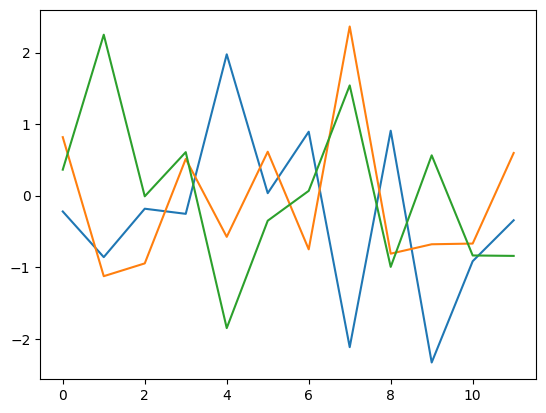

In [137]:
for node in IrisNetwork.layers[2].nodes:
    plt.plot(node.weights)

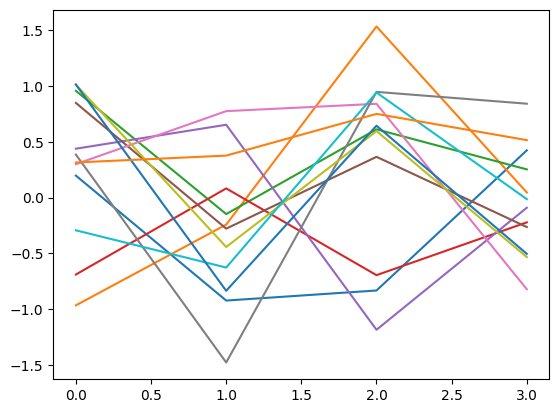

In [138]:
for node in IrisNetwork.layers[1].nodes:
    plt.plot(node.weights)

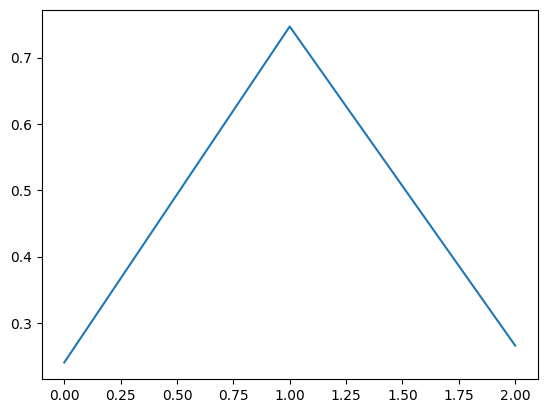

In [139]:
plt.plot([node.bias for node in IrisNetwork.layers[2].nodes])

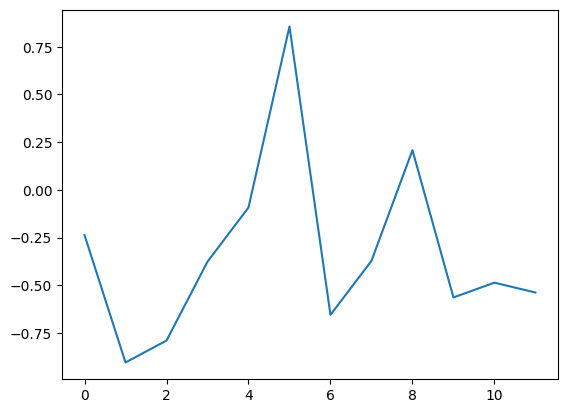

In [140]:
plt.plot([node.bias for node in IrisNetwork.layers[1].nodes])

In [141]:
IrisNetwork.layers[0].nodes[0].activation

6.7

In [142]:
counter : int = 0
for test in range(len(irisTest[0])):
    IrisNetwork.setInput(input=irisTest[:, test])
    IrisNetwork.runNetwork()
    #print(np.argmax(IrisNetwork.getOutput() [:, np.newaxis]), np.argmax(expectedTestOutputs[:, test] [:, np.newaxis]))
    if np.argmax(IrisNetwork.getOutput() [:, np.newaxis]) == np.argmax(expectedTestOutputs[:, test] [:, np.newaxis]):
        counter += 1

print(counter / len(irisTest[0]))
    

0.9333333333333333
